In [1]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('./preprocessing/data/filled_data_2022-06-14.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,dob,...,Ukraine,United Arab Emirates,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
0,192563,https://sofifa.com/player/192563/bernd-leno/22...,B. Leno,Bernd Leno,GK,83,84,28000000.0,87000.0,1992-03-04,...,0,0,0,0,0,0,0,0,0,0
1,233934,https://sofifa.com/player/233934/aaron-ramsdal...,A. Ramsdale,Aaron Ramsdale,GK,74,79,5000000.0,36000.0,1998-05-14,...,0,0,0,0,0,0,0,0,0,0
2,246671,https://sofifa.com/player/246671/arthur-okonkw...,A. Okonkwo,Arthur Okonkwo,GK,61,77,750000.0,3000.0,2001-09-09,...,0,0,0,0,0,0,0,0,0,0
3,202811,https://sofifa.com/player/202811/emiliano-mart...,E. Martínez,Damián Emiliano Martínez,GK,84,85,33500000.0,81000.0,1992-09-02,...,0,0,0,0,0,0,0,0,0,0
4,192317,https://sofifa.com/player/192317/jed-steer/220002,J. Steer,Jed Steer,GK,72,73,1900000.0,31000.0,1992-09-23,...,0,0,0,0,0,0,0,0,0,0


## Selecionando colunas booleanas para tirar insights de classificadores

In [3]:
bool_cols = [col for col in df if 
               df[col].dropna().value_counts().index.isin([0,1]).all()]
bool_cols

['Cautious With Crosses',
 'Chip Shot (AI)',
 'Comes For Crosses',
 'Dives Into Tackles (AI)',
 'Early Crosser',
 'Finesse Shot',
 'Flair',
 'GK Long Throw',
 'Giant Throw-in',
 'Injury Prone',
 'Leadership',
 'Long Passer (AI)',
 'Long Shot Taker (AI)',
 'Long Throw-in',
 'One Club Player',
 'Outside Foot Shot',
 'Playmaker (AI)',
 'Power Free-Kick',
 'Power Header',
 'Rushes Out Of Goal',
 'Saves with Feet',
 'Solid Player',
 'Speed Dribbler (AI)',
 'Team Player',
 'Technical Dribbler (AI)',
 '#Acrobat',
 '#Aerial Threat',
 '#Clinical Finisher',
 '#Complete Defender',
 '#Complete Forward',
 '#Complete Midfielder',
 '#Crosser',
 '#Distance Shooter',
 '#Dribbler',
 '#Engine',
 '#FK Specialist',
 '#Playmaker',
 '#Playmaker\xa0',
 '#Poacher',
 '#Speedster',
 '#Strength',
 '#Tackling',
 '#Tackling\xa0',
 '#Tactician',
 '#Tactician\xa0',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST',
 'High/High',
 'High/Low',
 'High/Medium',
 '

In [26]:
# Removendo colunas de nacionalidade, ids, urls e colunas não numéricas
features = df.columns[:171][~df.columns[:171].str.match('(.*_id.*|.*id_.*|.*url.*)')].to_list()
features = df[features]._get_numeric_data()
features

,overall,potential,value_eur,wage_eur,weight_kg,height_cm,club_jersey_number,weak_foot,skill_moves,international_reputation,...,Lean (185+),Normal (170-),Normal (170-185),Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique,Left,Right
0,83,84,28000000.0,87000.0,83,190,1.0,3,1,3,...,0,0,0,1,0,0,0,0,0,1
1,74,79,5000000.0,36000.0,77,188,32.0,3,1,1,...,1,0,0,0,0,0,0,0,0,1
2,61,77,750000.0,3000.0,83,196,33.0,2,1,1,...,1,0,0,0,0,0,0,0,0,1
3,84,85,33500000.0,81000.0,88,195,1.0,4,1,3,...,0,0,0,0,0,0,1,0,0,1
4,72,73,1900000.0,31000.0,80,188,12.0,2,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19173,58,66,450000.0,600.0,74,180,23.0,3,2,1,...,0,0,0,0,0,0,0,0,1,0
19174,55,65,275000.0,550.0,72,182,18.0,2,2,1,...,0,0,0,0,0,0,0,0,0,1
19175,55,65,275000.0,500.0,75,186,28.0,2,2,1,...,0,0,0,1,0,0,0,0,0,1
19176,55,67,300000.0,500.0,76,188,21.0,2,2,1,...,0,0,0,1,0,0,0,0,0,1


## Separando preditores e labels

In [29]:
X, y = features.drop('#FK Specialist', axis=1), df['#FK Specialist']

## Tirando insights sobre melhores features

In [46]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
start = time.time()

# define the method
selector = RFECV(estimator=LogisticRegression(), scoring='recall', n_jobs=-1)

# fit the model
selector = selector.fit(X, y)

print(f'Execution time: {(time.time()-start):.2f} seconds.')
# Report feature ranking
order = pd.DataFrame({'coluna': X.columns}, index=selector.ranking_).sort_index().rename_axis('prioridade', axis=1)
order

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_op

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Execution time: 257.82 seconds.


prioridade,coluna
1,skill_fk_accuracy
2,goalkeeping_kicking
3,gk
4,attacking_crossing
5,goalkeeping_reflexes
...,...
154,#Tackling
155,#Tackling
156,#Poacher
157,#Tactician


Vamos então treinar um classificador de Regressão Logística para prever se um jogador é especialista em tiro livre ou não

# Treinando modelo

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[['skill_fk_accuracy',]], df['#FK Specialist'], random_state=0)

In [33]:
# Treinando modelo
model = LogisticRegressionCV(scoring='recall').fit(X_train, y_train)

# Avaliando Modelo

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [35]:
y_pred = model.predict(X_test)

### Acurácia

In [44]:
acuracia = accuracy_score(y_test, y_pred)
print(f'acurácia = {acuracia:.3f}')

acurácia = 1.000


### Recall

In [37]:
rc = recall_score(y_test, y_pred)
print(f'recall = {rc:.3f}')

recall = 1.000


### Verificando labels ou classes do nosso modelo

In [38]:
model.classes_

array([0, 1], dtype=int64)

### Verificando coeficiente de correlação de cada uma das features

In [43]:
for i in range(len(model.coef_)):
    print(f'model.coef_  = {model.coef_[i].round(3)}')

model.coef_ [3.421]


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)

In [41]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

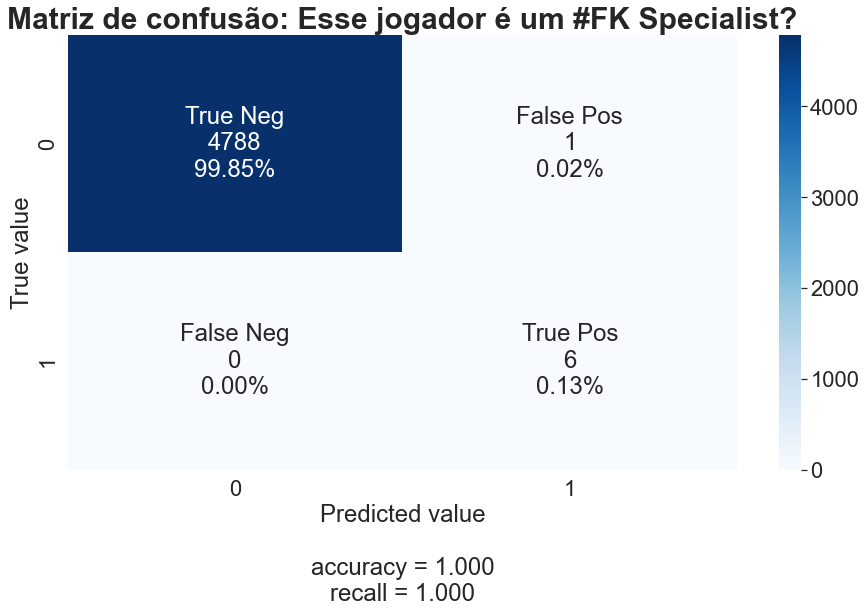

In [45]:
plt.figure(figsize=(15,8))
plt.title('Matriz de confusão: Esse jogador é um #FK Specialist?', weight='bold').set_fontsize(30)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Blues')
plt.xlabel(f'Predicted value\n\naccuracy = {acuracia:.3f}\nrecall = {rc:.3f}')
plt.ylabel('True value')
plt.show()